### 20181019 lentiviral infection flow data

In [1]:
import fcsparser

import pandas as pd
import math
import os
#import all data, and merge into a single datatframe, with sample names in extra columns


def log_trans(x):
    try:
        return math.log(x, 10)
    except:
        return float('NaN')

data_folder = '20181019_lenti'
    
crisprx_lines = ['54_UGAC-blast_x',
'55_UGAC-blast_x',
'56_UGAC_x',
'58_AQP4_x',
'60_OPRL1_x']
#crisprx_guides = ['154_NT1', '155_NT2', '156_ETF1', '157_ETF1']
crisprx_guides = ['NT1', 'NT2', 'ETF1_1', 'ETF1_2']

crispra_lines = [
'61_OPRL1_a', '59_AQP4_a', '57_UGAC_a']
crispra_guides = ['ETF1_1', 'ETF1_2', 'UPF1_1', 'UPF1_2', 'NT1', 'NT2']

dfs = []
index = 0
for cell_line in crisprx_lines:
    for guide in crisprx_guides:
        index += 1
        data_file_name = 'Specimen_001_BFP_GFP_tdtomato_%03d_%03d.fcs' % (index, index)
        data_file_path = os.path.join(data_folder, data_file_name)
        meta, data = fcsparser.parse(data_file_path, meta_data_only=False, reformat_meta=True)
        data['cell line'] = cell_line
        data['guide'] = guide
        data['sample'] = '%s %s' % (cell_line, guide)
        
        #dfs.append(data.sample(n=1000)) 
        dfs.append(data) #to subsample and speed up plotting, use the above line instead of this one
for cell_line in crispra_lines:
    for guide in crispra_guides:
        index += 1
        data_file_name = 'Specimen_001_BFP_GFP_tdtomato_%03d_%03d.fcs' % (index, index)
        data_file_path = os.path.join(data_folder, data_file_name)
        meta, data = fcsparser.parse(data_file_path, meta_data_only=False, reformat_meta=True)
        data['cell line'] = cell_line
        data['guide'] = guide
        data['sample'] = '%s %s' % (cell_line, guide)
        
        #dfs.append(data.sample(n=1000)) 
        dfs.append(data) #to subsample and speed up plotting, use the above line instead of this one
        
all_data = pd.concat(dfs)

In [2]:
all_data.describe()

FSC-A          FSC-H          FSC-W          SSC-A  \
count  152032.000000  152032.000000  152032.000000  152032.000000   
mean     9390.959961    8325.203125   73648.343750    2872.193604   
std      2675.166260    2022.250122    6844.413574    2329.698975   
min      5083.959961    5008.000000   65128.917969     488.399994   
25%      7605.840332    6936.000000   70663.160156    1694.599976   
50%      8961.919922    8096.000000   72216.902344    2209.640137   
75%     10581.980469    9388.000000   74202.978516    3040.660156   
max     58182.132812   34810.000000  208086.625000  101480.640625   

               SSC-H          SSC-W  Pacific Blue-A  Pacific Blue-H  \
count  152032.000000  152032.000000   152032.000000   152032.000000   
mean     2192.724365   83582.320312     1377.481323     1099.400146   
std      1529.097290    9883.312500     1539.721680     1134.645264   
min       425.000000   44726.851562      -28.380001        0.000000   
25%      1383.000000   78556.070312      241.560013      193.000000   
50%      1762.000000   81339.375000     1056.660034      877.000000   
75%      2353.000000   85083.226562     1896.180054     1548.000000   
max     49936.000000  252650.281250    42229.441406    18999.000000   

       Pacific Blue-W           PE-A           PE-H           PE-W  \
count   152032.000000  152032.000000  152032.000000  152032.000000   
mean     80157.921875    1203.296753     875.371277   87795.164062   
std      10395.536133    1789.291748    1183.371338   15010.417969   
min          0.000000      -2.960000      57.000000       0.000000   
25%      76000.958984     408.480011     312.000000   79415.427734   
50%      79164.296875     710.400024     533.000000   86664.851562   
75%      82998.152344    1351.239990    1004.000000   94761.843750   
max     262143.000000  108586.125000   32858.000000  262143.000000   

               GFP-A          GFP-H          GFP-W           Time  
count  152032.000000  152032.000000  152032.000000  152032.000000  
mean      159.175140     403.644287   33431.839844     935.618713  
std       402.814331     199.919128   37741.375000     859.518372  
min      -666.000000      38.000000       0.000000      42.900002  
25%       -82.880005     263.000000       0.000000     285.600006  
50%       114.700005     390.000000   20617.944336     645.299988  
75%       345.580017     494.000000   58066.515625    1351.524994  
max     21684.220703   10091.000000  220520.078125    4919.700195

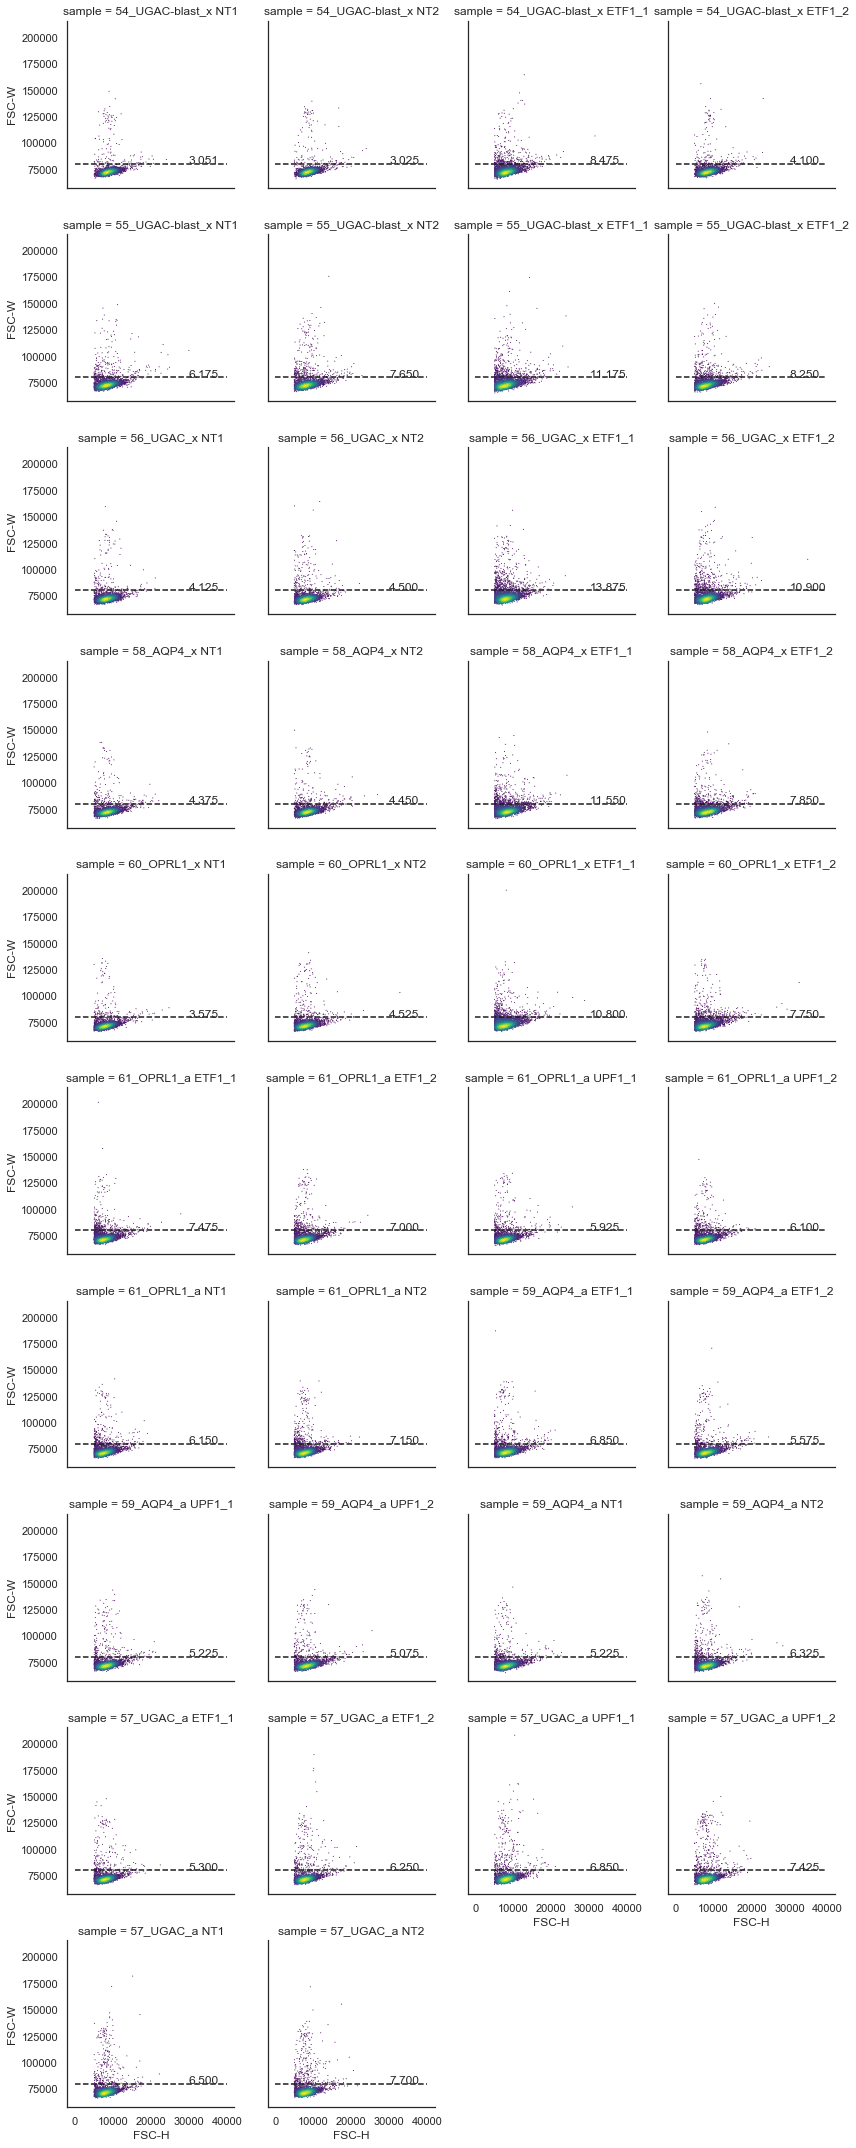

In [3]:
#first just look at the forward and side scatter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
def density_colored_scatter(x, y, color, **kwargs):
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, **kwargs)
    #plt.yscale('log')
    #plt.xscale('log')
    cutoff = 80000
    pos = [yval for yval in y if yval>=cutoff]
    percent_pos = 100.*len(pos)/len(y)
    plt.hlines(cutoff,0,40000, linestyle='dashed')
    plt.annotate("%.3f" % percent_pos, xy=(30000, cutoff+1))


g = sns.FacetGrid(all_data, col="sample", col_wrap=4)

cmap = 'viridis'
g= g.map(density_colored_scatter, "FSC-H", "FSC-W", cmap=cmap, s=1, linewidth=0)
plt.savefig('20181019_FSC_WH.pdf', transparent=True)
plt.savefig('20181019_FSC_WH.png', transparent=True)


In [4]:
fsc_filter = all_data[all_data['FSC-W']<80000]

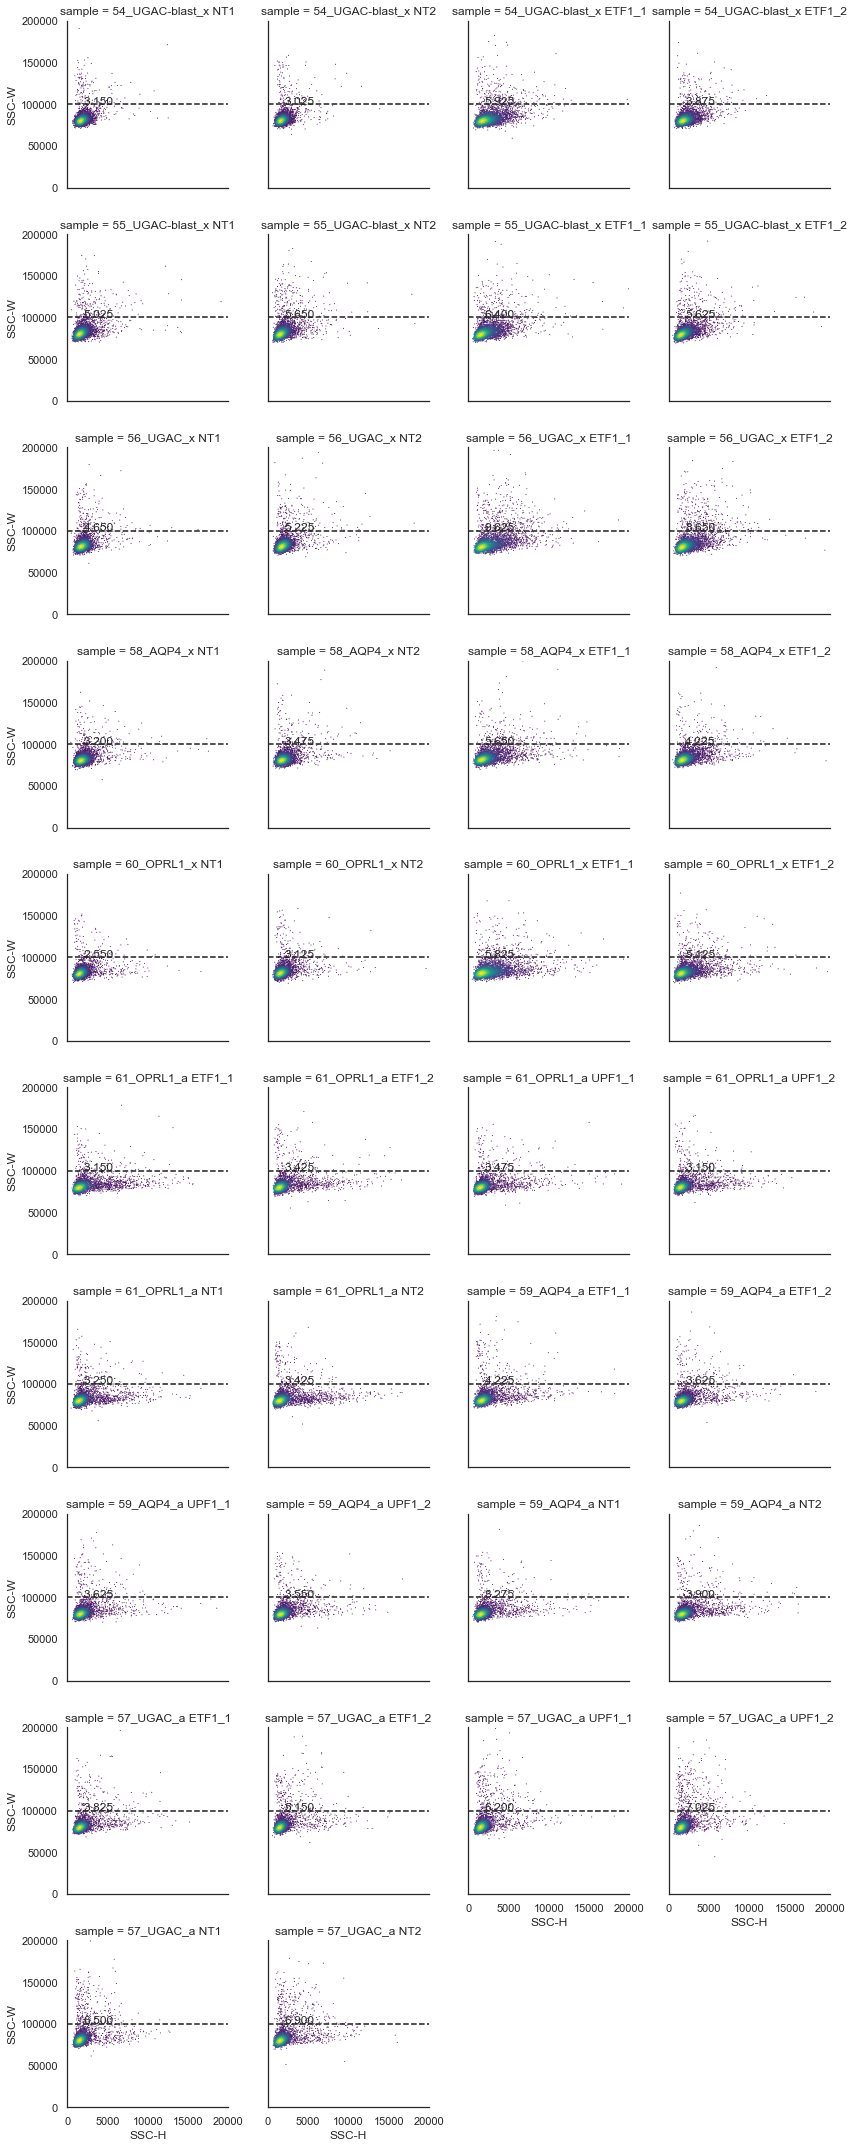

In [5]:
#first just look at the forward and side scatter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
def density_colored_scatter(x, y, color, **kwargs):
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, **kwargs)
    #plt.yscale('log')
    #plt.xscale('log')
    cutoff = 100000
    pos = [yval for yval in y if yval>=cutoff]
    percent_pos = 100.*len(pos)/len(y)
    plt.hlines(cutoff,0,20000, linestyle='dashed')
    plt.annotate("%.3f" % percent_pos, xy=(2000, cutoff+1))

#,ylim=(1,1000000)
g = sns.FacetGrid(all_data, col="sample", col_wrap=4, xlim=(0,20000), ylim=(0,200000))

cmap = 'viridis'
g= g.map(density_colored_scatter, "SSC-H", "SSC-W", cmap=cmap, s=1, linewidth=0)
plt.savefig('20181019_SSC_WH.pdf', transparent=True)
plt.savefig('20181019_SSC_WH.png', transparent=True)


In [6]:
fsc_ssc_filter = fsc_filter[fsc_filter['SSC-W']<100000]

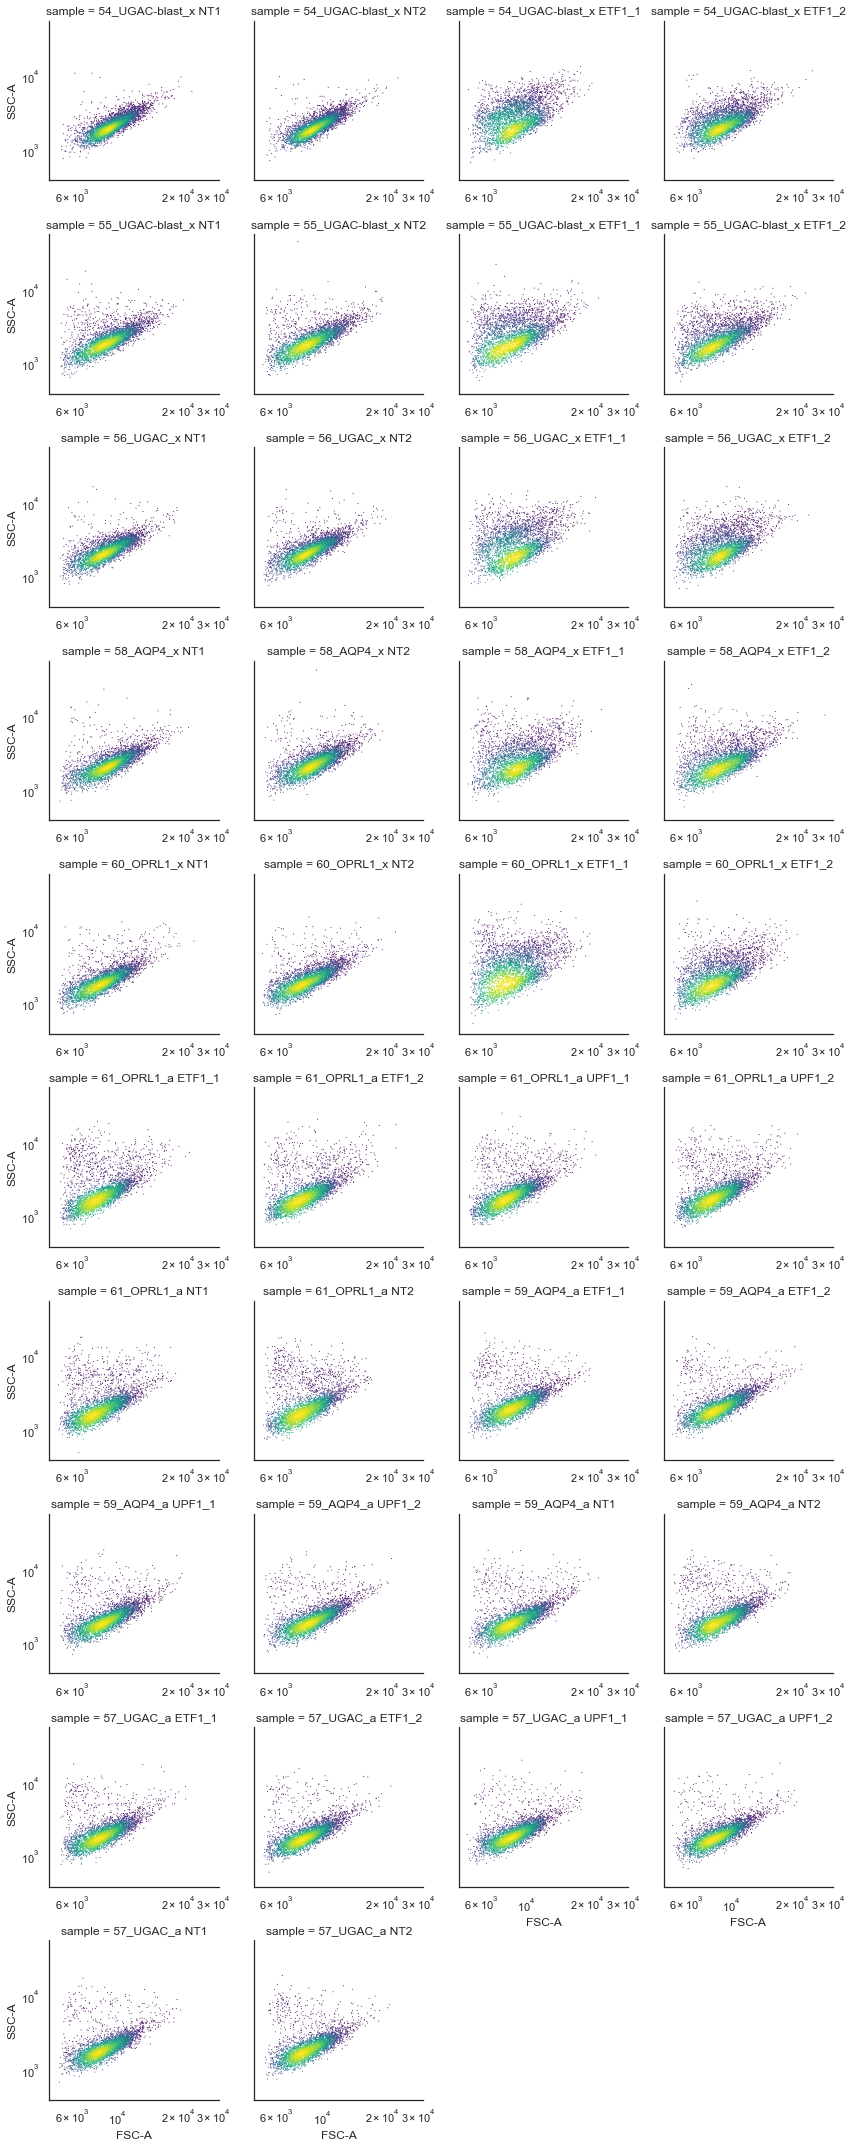

In [7]:
#first just look at the forward and side scatter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
def density_colored_scatter(x, y, color, **kwargs):
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, **kwargs)
    plt.yscale('log')
    plt.xscale('log')
    #cutoff = 400
    #pos = [xval for xval in x if xval>=cutoff]
    #percent_pos = 100.*len(pos)/len(x)
    #plt.vlines(cutoff,1,1000000, linestyle='dashed')
    #plt.annotate("%.1f" % percent_pos, xy=(cutoff+1, 500000))
    
#xlim=(1,1000000),ylim=(1,1000000)
g = sns.FacetGrid(fsc_ssc_filter, col="sample", col_wrap=4)

cmap = 'viridis'
g= g.map(density_colored_scatter, "FSC-A", "SSC-A", cmap=cmap, s=1, linewidth=0)
plt.savefig('20181019_fsc_ssc_filtered_FSC_SSC_A.pdf', transparent=True)
plt.savefig('20181019_fsc_ssc_filtered_FSC_SSC_A.png', transparent=True)


In [8]:
good_scatter = fsc_ssc_filter.rename(index=str, columns={'PE-A':'tdTomato-A', 'Pacific Blue-A':'tagBFP-A'})
good_scatter['tdTomato/tagBFP'] = good_scatter['tdTomato-A']/good_scatter['tagBFP-A']
good_scatter['log tdTomato'] = good_scatter['tdTomato-A'].apply(log_trans)
good_scatter['log tagBFP'] = good_scatter['tagBFP-A'].apply(log_trans)
good_scatter['log GFP'] = good_scatter['GFP-A'].apply(log_trans)
good_scatter['log tdTomato/tagBFP'] = good_scatter['tdTomato/tagBFP'].apply(log_trans)

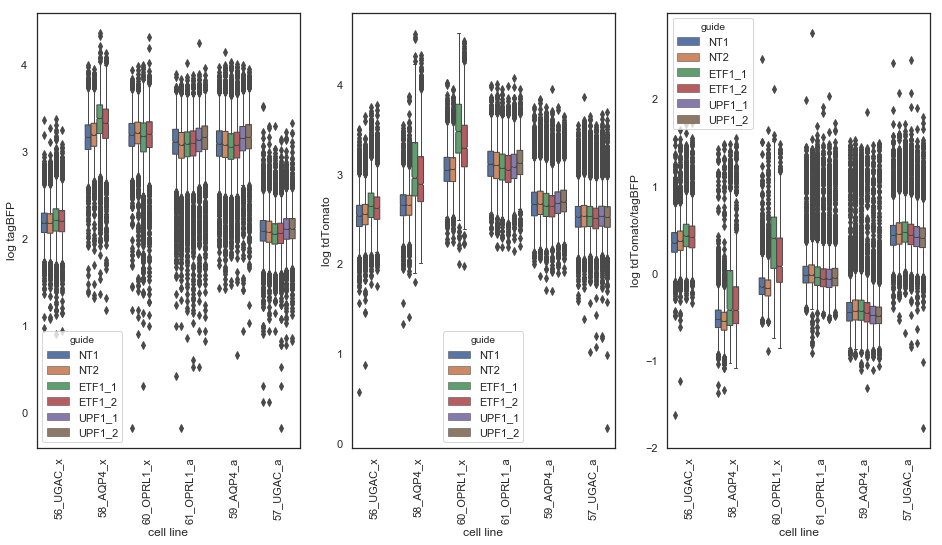

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

fluor_reporters = ['56_UGAC_x',
'57_UGAC_a',
'58_AQP4_x',
'59_AQP4_a',
'60_OPRL1_x',
'61_OPRL1_a']

blast_reporters = ['54_UGAC-blast_x',
'55_UGAC-blast_x']

fig, ax = plt.subplots(1,3, figsize=(16, 8), sharey=False)
sns.boxplot(x="cell line", y="log tagBFP", hue='guide', data=good_scatter[good_scatter['cell line'].isin(fluor_reporters)], ax=ax[0], notch=True, linewidth=1)
sns.boxplot(x="cell line", y="log tdTomato", hue='guide', data=good_scatter[good_scatter['cell line'].isin(fluor_reporters)], ax=ax[1], notch=True, linewidth=1)
sns.boxplot(x="cell line", y="log tdTomato/tagBFP", hue='guide', data=good_scatter[good_scatter['cell line'].isin(fluor_reporters)], ax=ax[2], notch=True, linewidth=1)

for ind_axis in ax:
    for label in ind_axis.get_xticklabels():
        label.set_rotation(90)
plt.savefig('20181019_log_tagBFP_tdTomato.pdf', transparent=True)

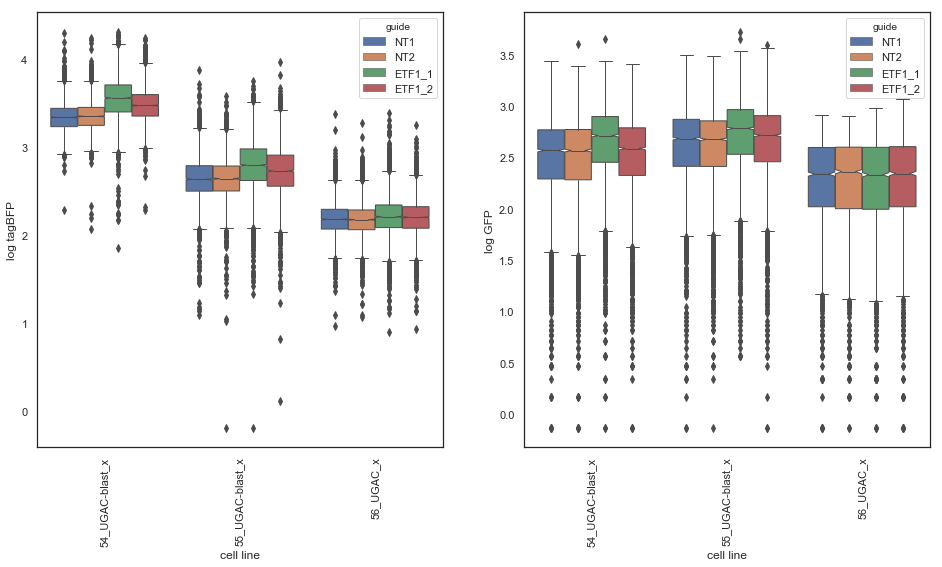

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

fluor_reporters = ['56_UGAC_x',
'57_UGAC_a',
'58_AQP4_x',
'59_AQP4_a',
'60_OPRL1_x',
'61_OPRL1_a']

blast_reporters = ['56_UGAC_x', '54_UGAC-blast_x',
'55_UGAC-blast_x']

fig, ax = plt.subplots(1,2, figsize=(16, 8), sharey=False)
sns.boxplot(x="cell line", y="log tagBFP", hue='guide', data=good_scatter[good_scatter['cell line'].isin(blast_reporters)], ax=ax[0], notch=True, linewidth=1)
sns.boxplot(x="cell line", y="log GFP", hue='guide', data=good_scatter[good_scatter['cell line'].isin(blast_reporters)], ax=ax[1], notch=True, linewidth=1)

for ind_axis in ax:
    for label in ind_axis.get_xticklabels():
        label.set_rotation(90)
plt.savefig('20181019_log_tagBFP_eGFP.pdf', transparent=True)

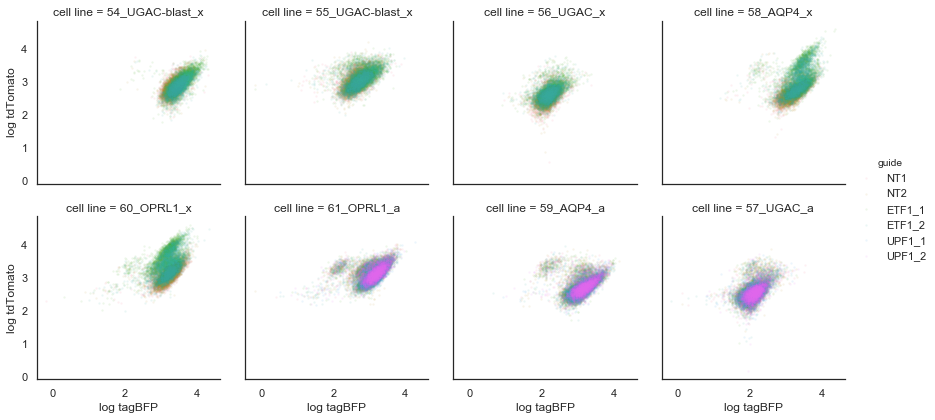

In [11]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
colors = ["greyish", "windows blue", "amber", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
g = sns.FacetGrid(good_scatter, col="cell line", hue="guide", col_wrap=4,
                  legend_out=True)
#xlim=(0,5000),ylim=(0,1000)
g= g.map(plt.scatter, "log tagBFP", "log tdTomato", cmap=cmap, s=5, linewidth=0, alpha=0.1)
g = g.add_legend()

#for i, ax in enumerate(g.axes.flat):
#    ax.set_yscale('log')
#    ax.set_xscale('log')
plt.savefig('201801019_tagBFP_tdTomato_log_scatter_hue.pdf', transparent=True)
plt.savefig('201801019_tagBFP_tdTomato_log_scatter_hue.png', transparent=True)
#plt.legend()


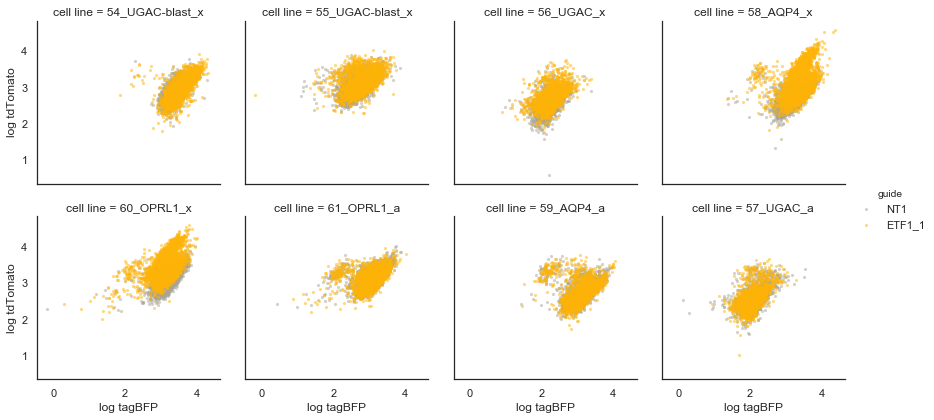

In [12]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
colors = ["greyish", "amber", "windows blue", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
g = sns.FacetGrid(good_scatter[good_scatter['guide'].isin(['NT1', 'ETF1_1'])], col="cell line", hue="guide", col_wrap=4,
                  legend_out=True)
#xlim=(0,5000),ylim=(0,1000)
g= g.map(plt.scatter, "log tagBFP", "log tdTomato", cmap=cmap, s=10, linewidth=0, alpha=0.5)
g = g.add_legend()

#for i, ax in enumerate(g.axes.flat):
#    ax.set_yscale('log')
#    ax.set_xscale('log')
plt.savefig('201801019_tagBFP_tdTomato_log_scatter_hue_sub.pdf', transparent=True)
plt.savefig('201801019_tagBFP_tdTomato_log_scatter_hue_sub.png', transparent=True)
#plt.legend()


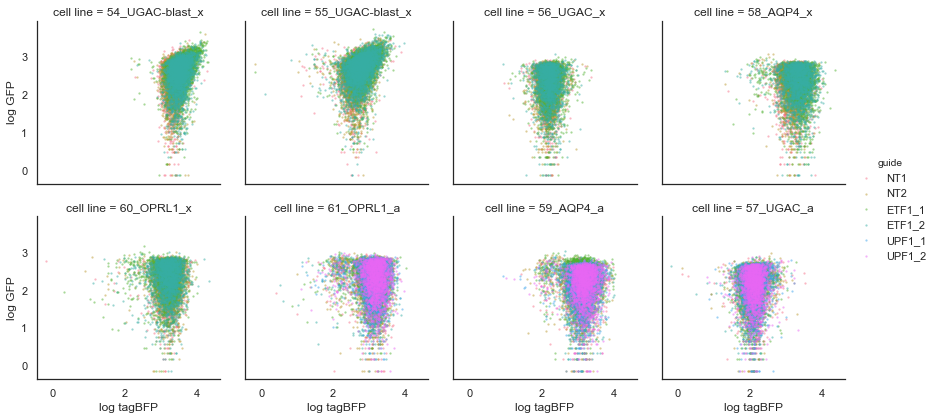

In [13]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
colors = ["greyish", "windows blue", "amber", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
g = sns.FacetGrid(good_scatter, col="cell line", hue="guide", col_wrap=4,
                  legend_out=True)
#xlim=(0,5000),ylim=(0,1000)
g= g.map(plt.scatter, "log tagBFP", "log GFP", cmap=cmap, s=5, linewidth=0, alpha=0.5)
g = g.add_legend()

#for i, ax in enumerate(g.axes.flat):
#    ax.set_yscale('log')
#    ax.set_xscale('log')
plt.savefig('201801019_tagBFP_GFP_log_scatter_hue.pdf', transparent=True)
plt.savefig('201801019_tagBFP_GFP_log_scatter_hue.png', transparent=True)
#plt.legend()


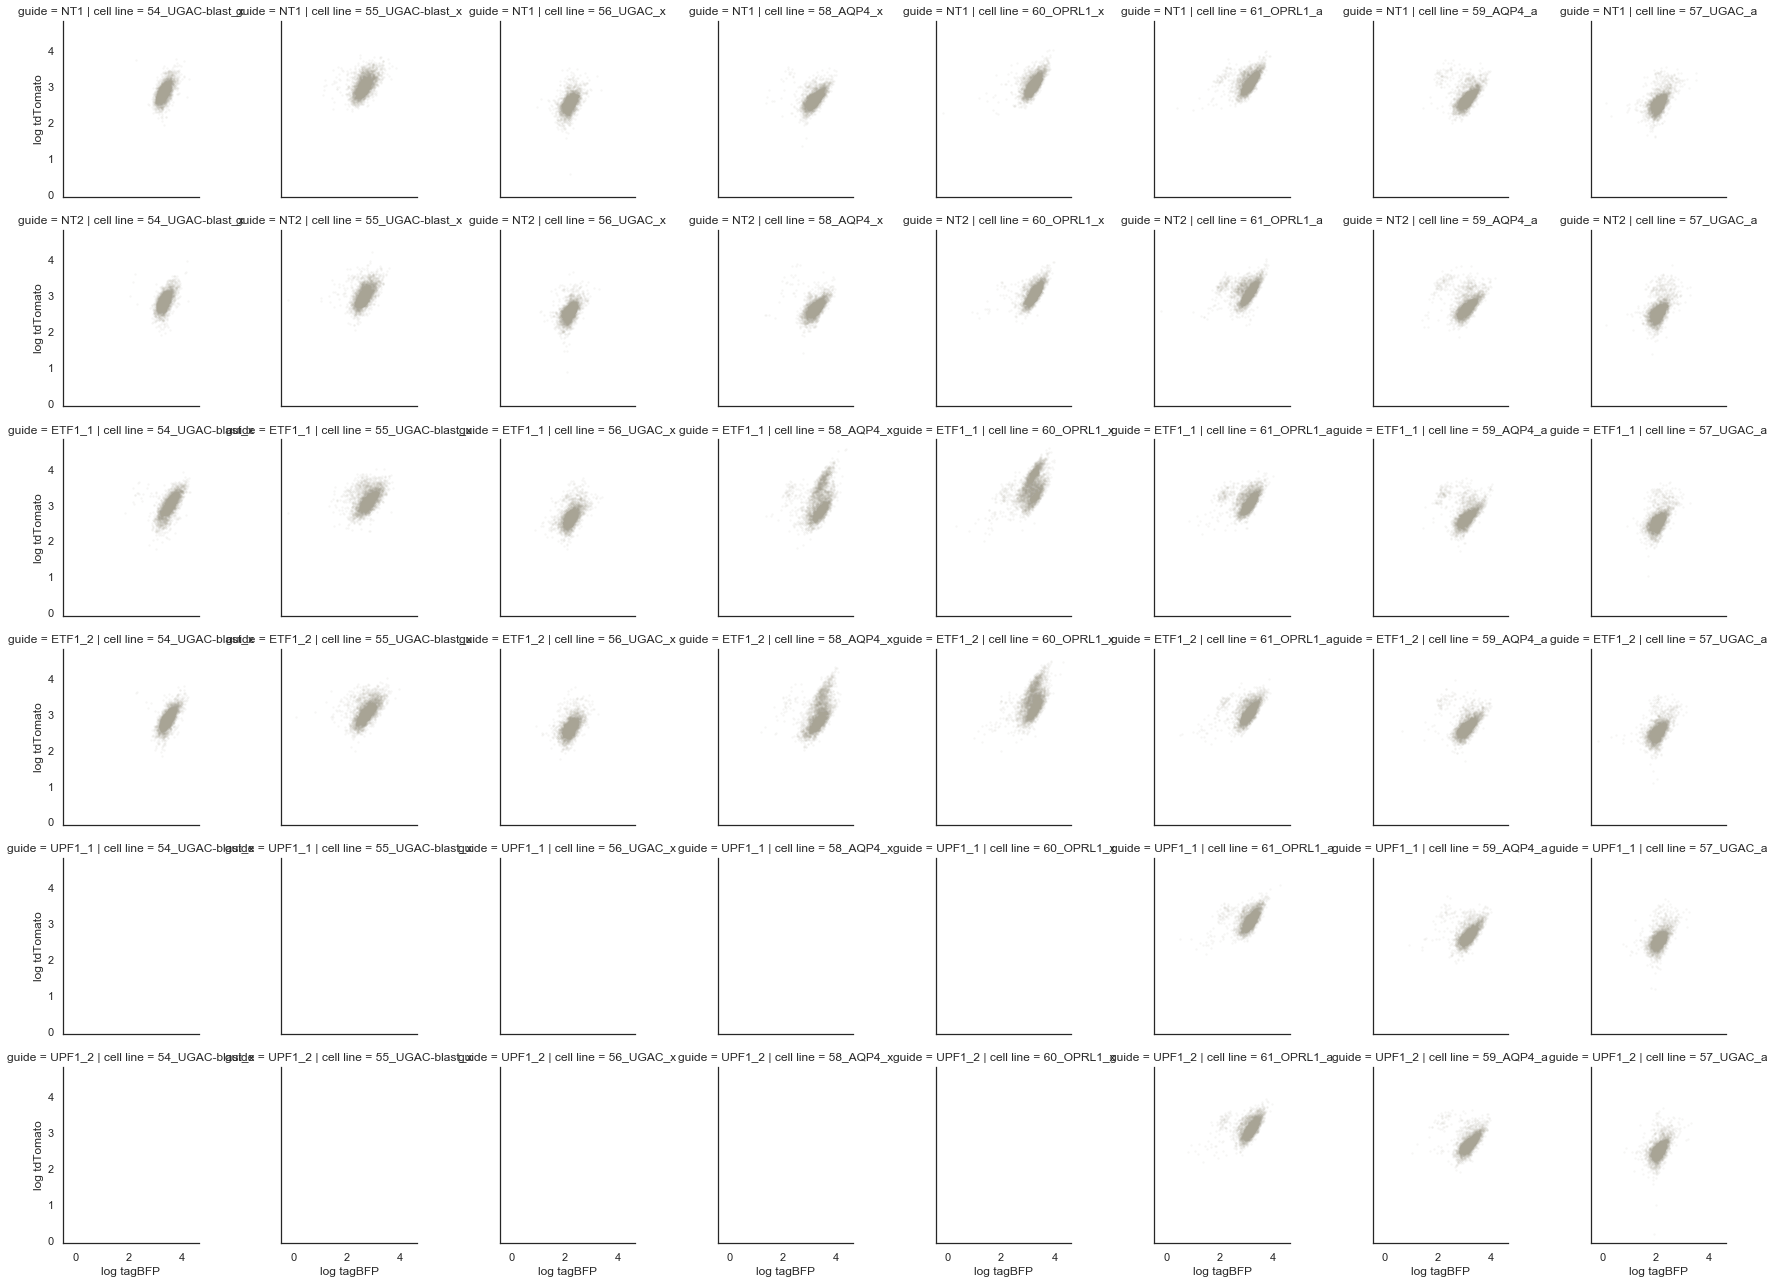

In [15]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
colors = ["greyish", "windows blue", "amber", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
g = sns.FacetGrid(good_scatter, col="cell line", row="guide",
                  legend_out=True)
#xlim=(0,5000),ylim=(0,1000)
g= g.map(plt.scatter, "log tagBFP", "log tdTomato", cmap=cmap, s=5, linewidth=0, alpha=0.1)
g = g.add_legend()

#for i, ax in enumerate(g.axes.flat):
#    ax.set_yscale('log')
#    ax.set_xscale('log')
plt.savefig('201801019_tagBFP_tdTomato_log_scatter_row.pdf', transparent=True)
plt.savefig('201801019_tagBFP_tdTomato_log_scatter_row.png', transparent=True)
#plt.legend()


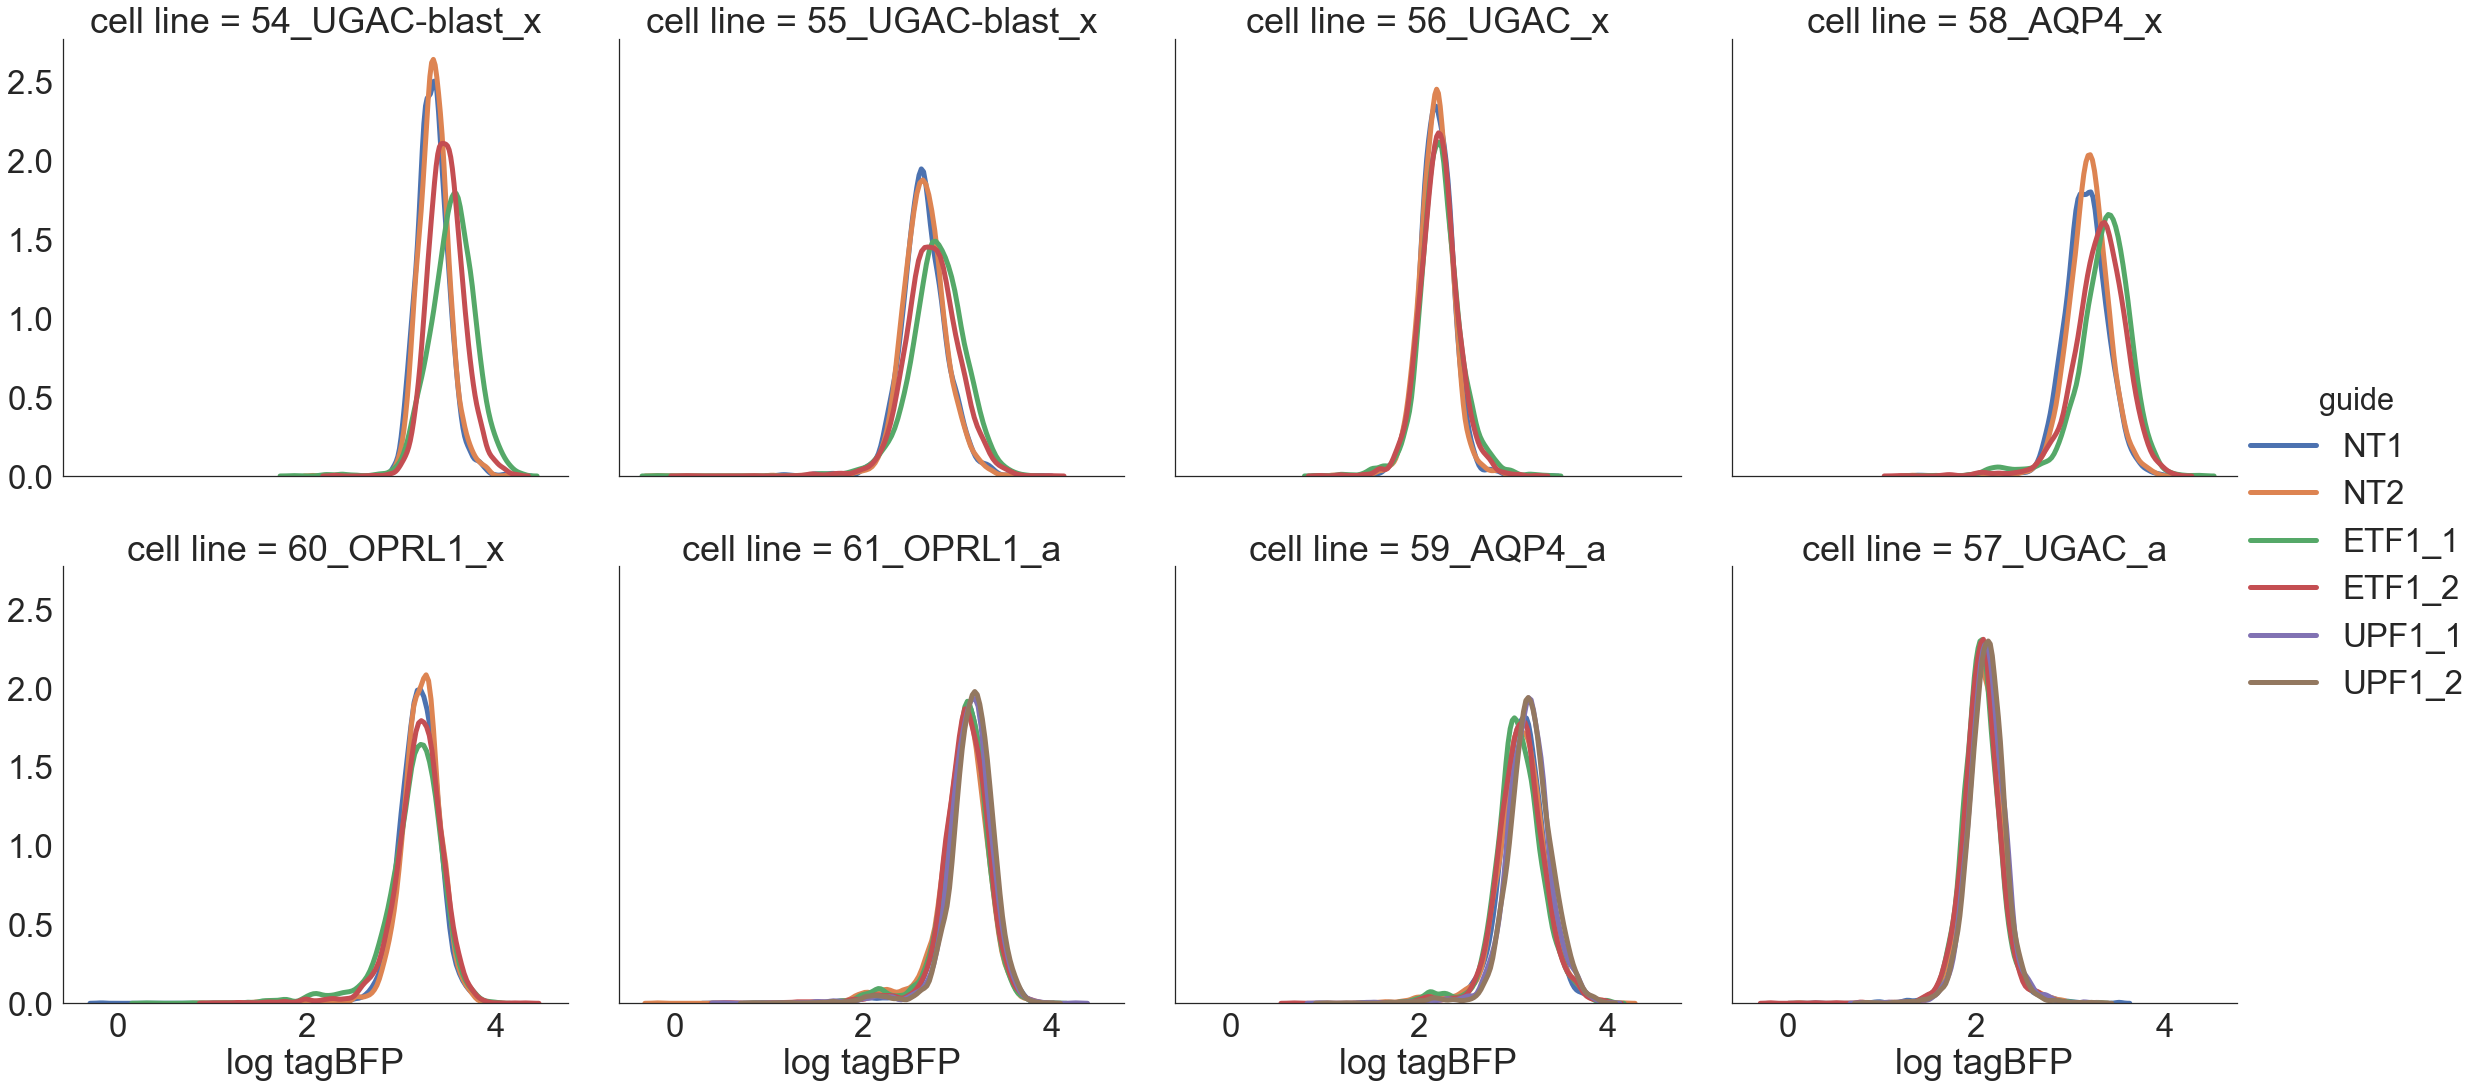

In [16]:
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True, font_scale=3)
g = sns.FacetGrid(good_scatter, hue='guide', col='cell line', col_wrap=4, height=8)
g.map(sns.kdeplot, 'log tagBFP', linewidth = 5)
#g.fig.suptitle("filtered for td", size=16)
g.add_legend();
plt.savefig('20181019_log_tagBFP_kde.pdf', transparent=True)


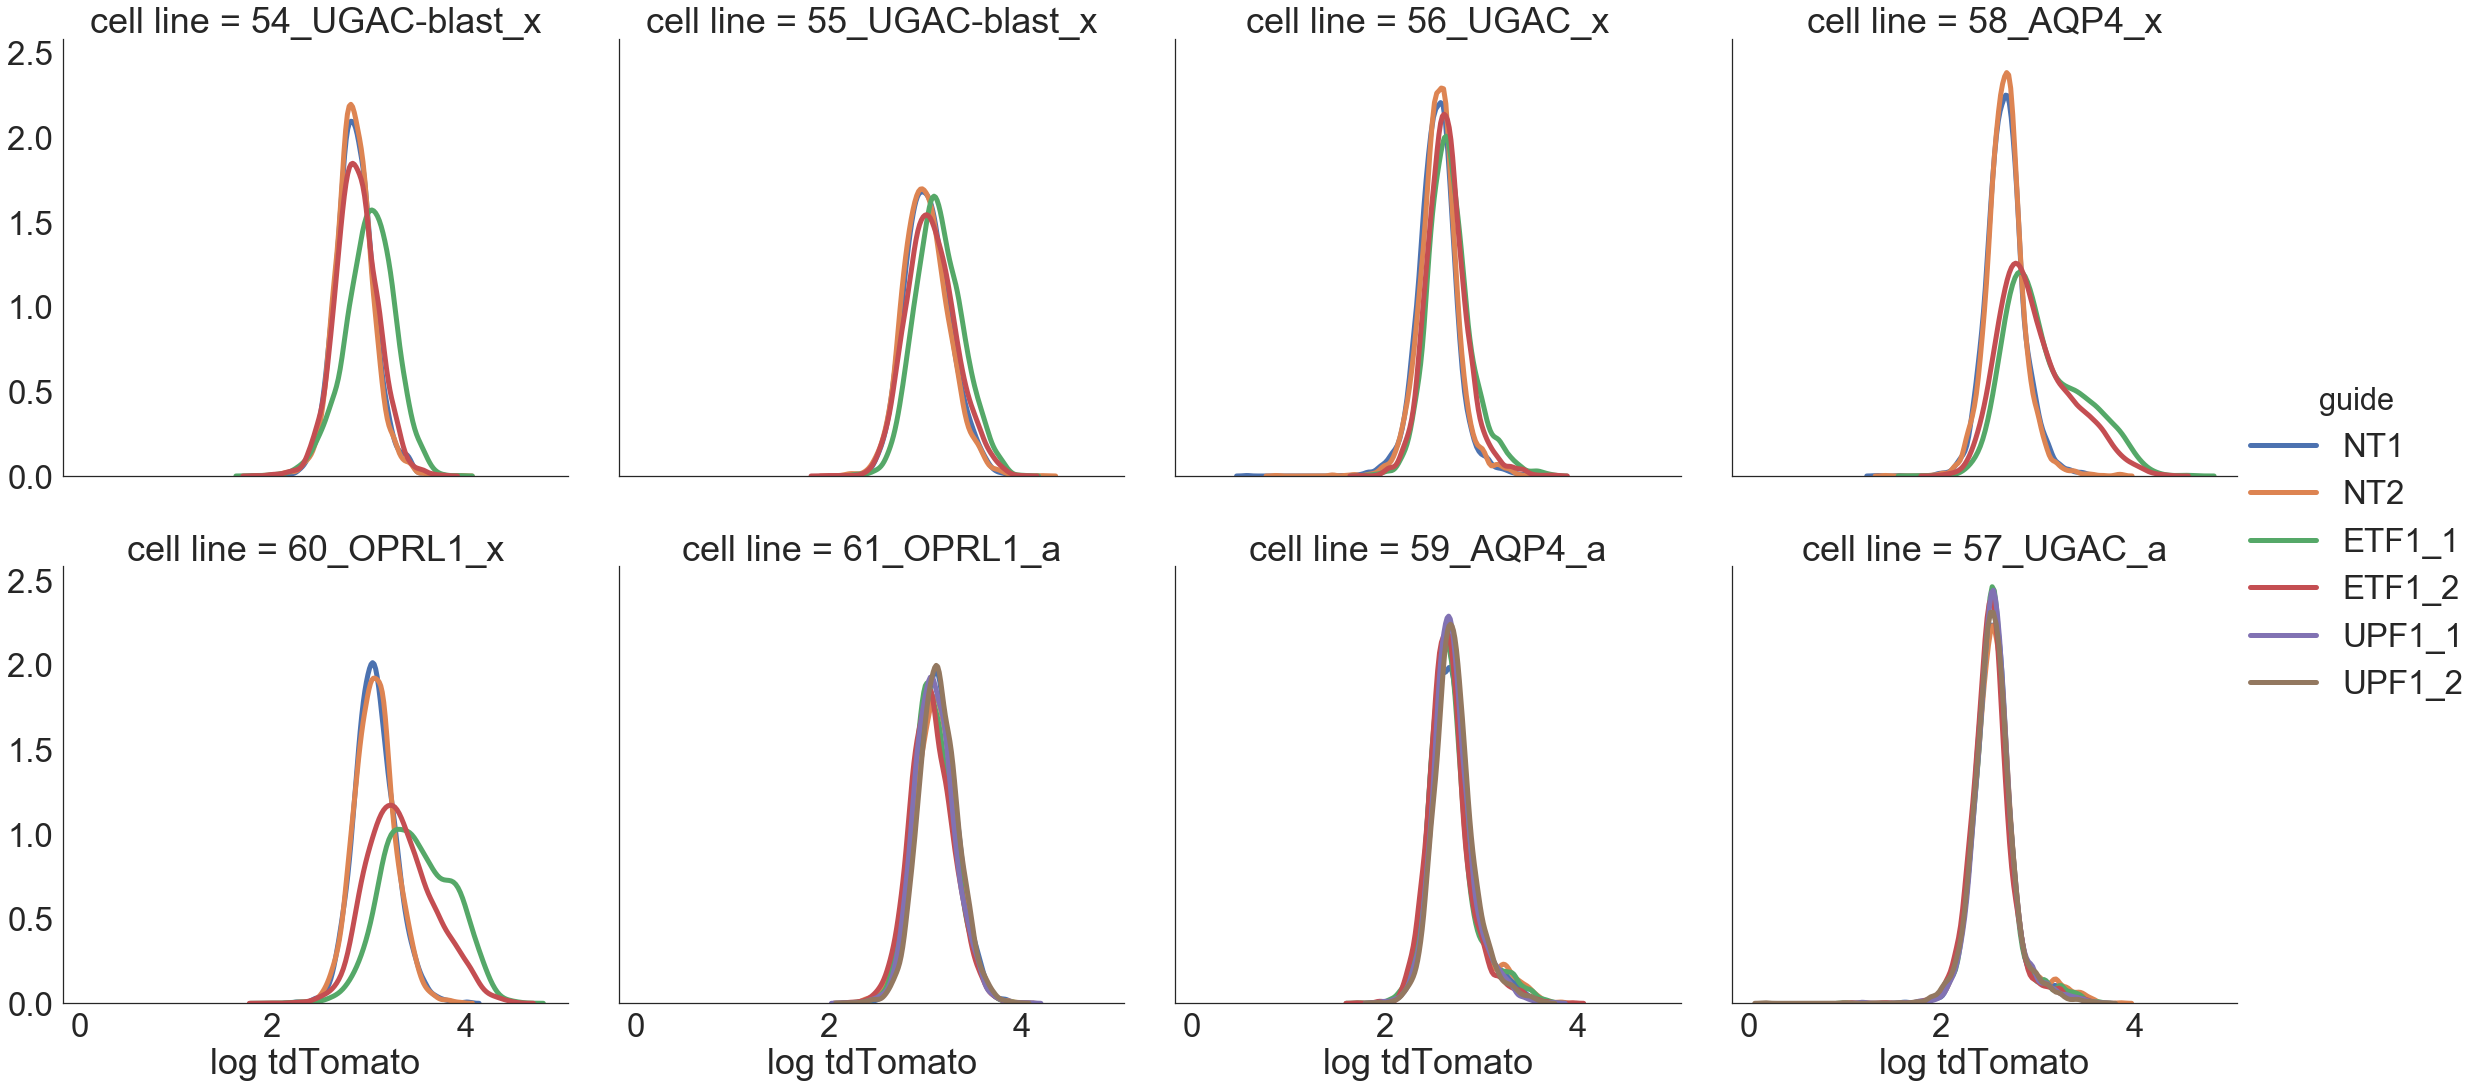

In [17]:
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True, font_scale=3)
g = sns.FacetGrid(good_scatter, hue='guide', col='cell line', col_wrap=4, height=8)
g.map(sns.kdeplot, 'log tdTomato', linewidth = 5)
#g.fig.suptitle("filtered for td", size=16)
g.add_legend();
plt.savefig('20181019_log_tdTomato_kde.pdf', transparent=True)


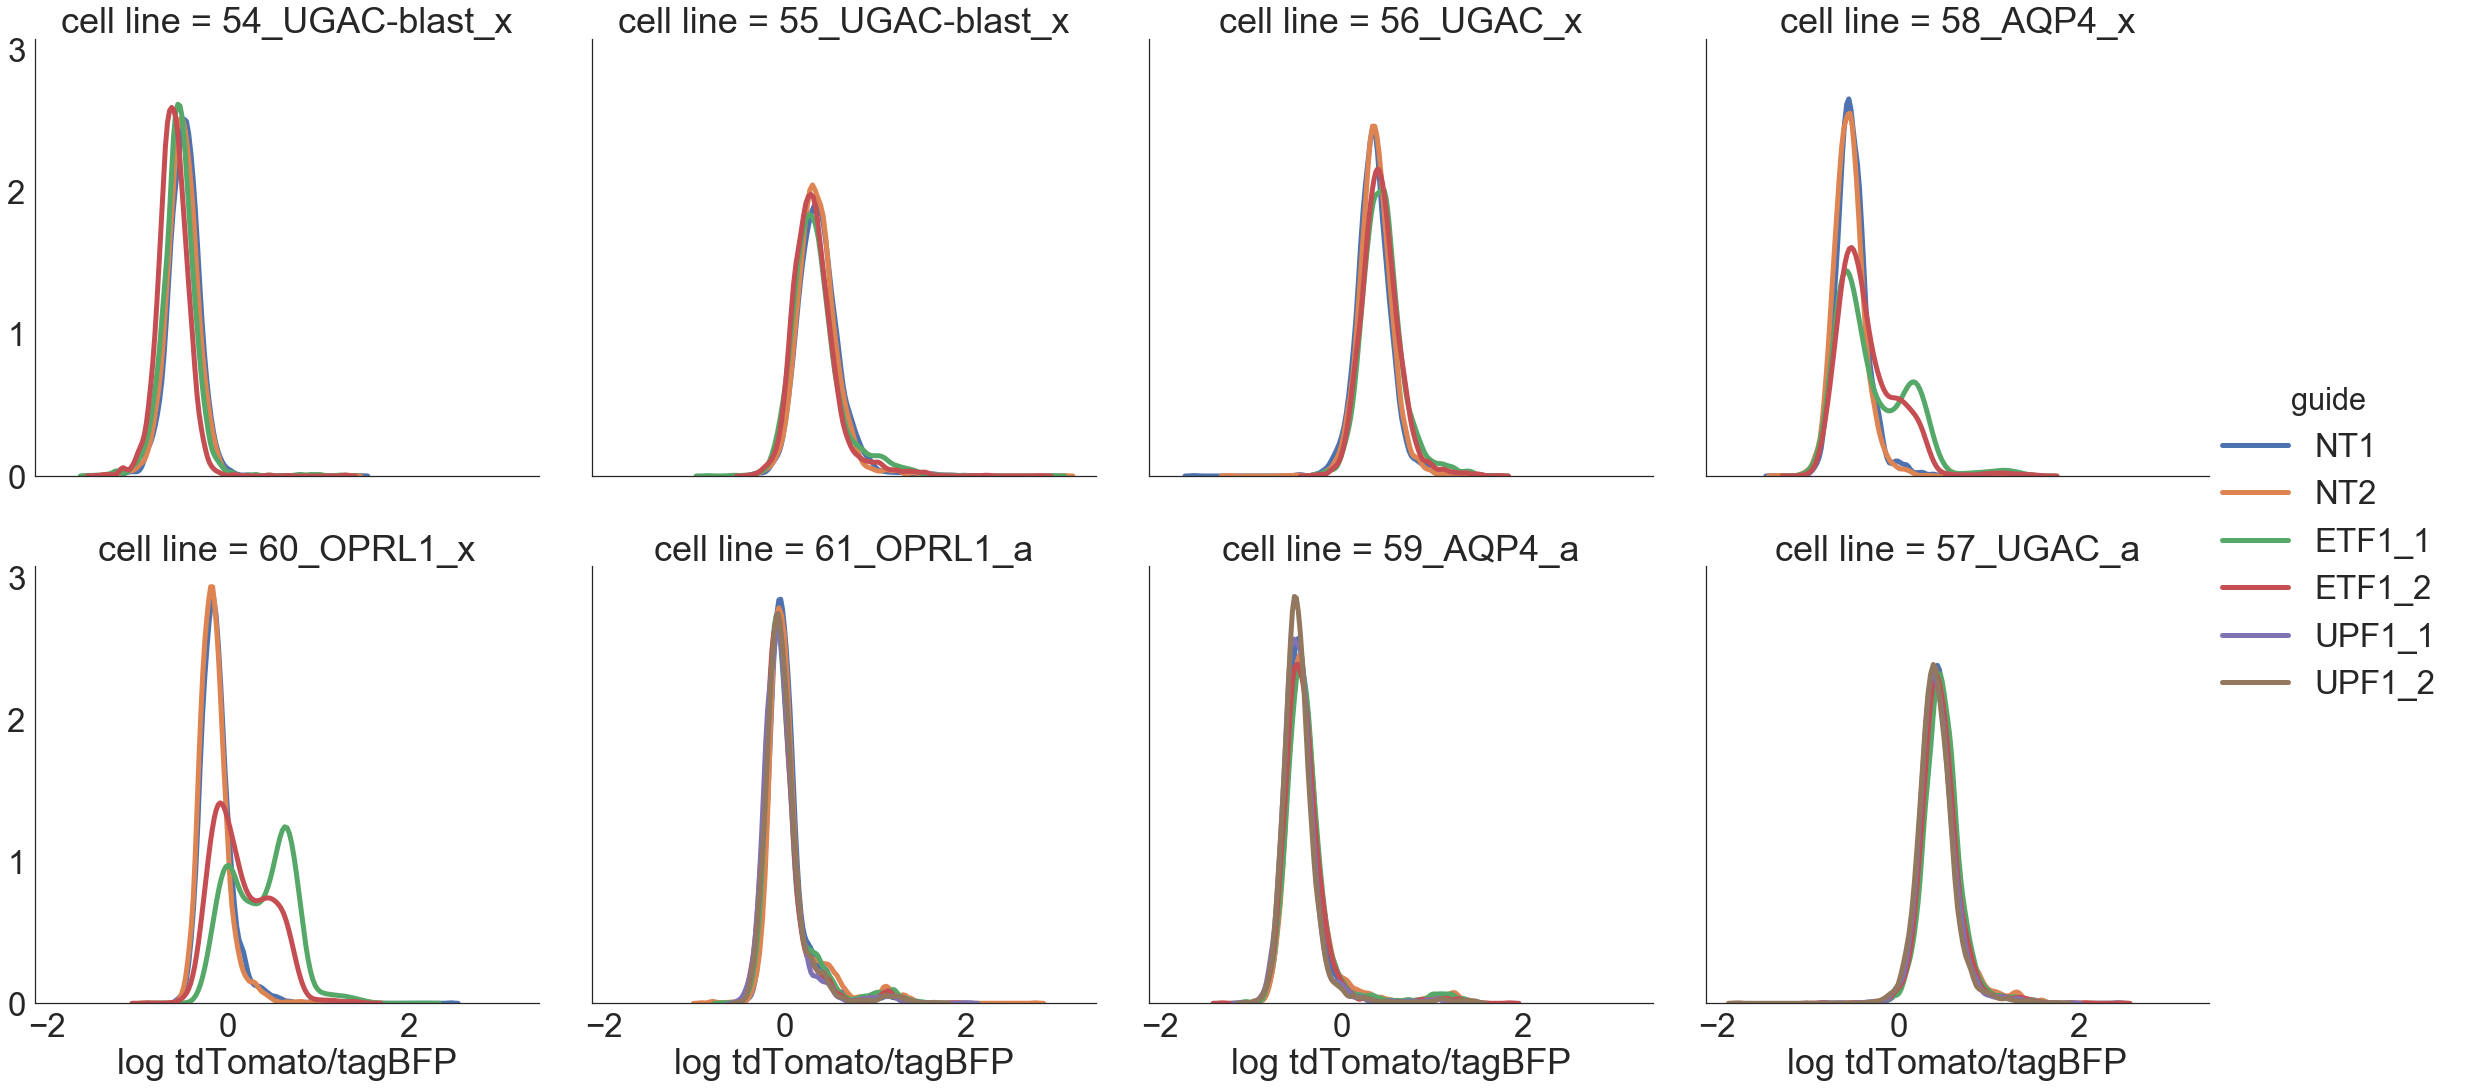

In [18]:
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True, font_scale=3)
g = sns.FacetGrid(good_scatter, hue='guide', col='cell line', col_wrap=4, height=8)
g.map(sns.kdeplot, "log tdTomato/tagBFP", linewidth = 5)
#g.fig.suptitle("filtered for td", size=16)
g.add_legend();
plt.savefig('20181019_log_tdTomato_tagBFP_ratio_kde.pdf', transparent=True)


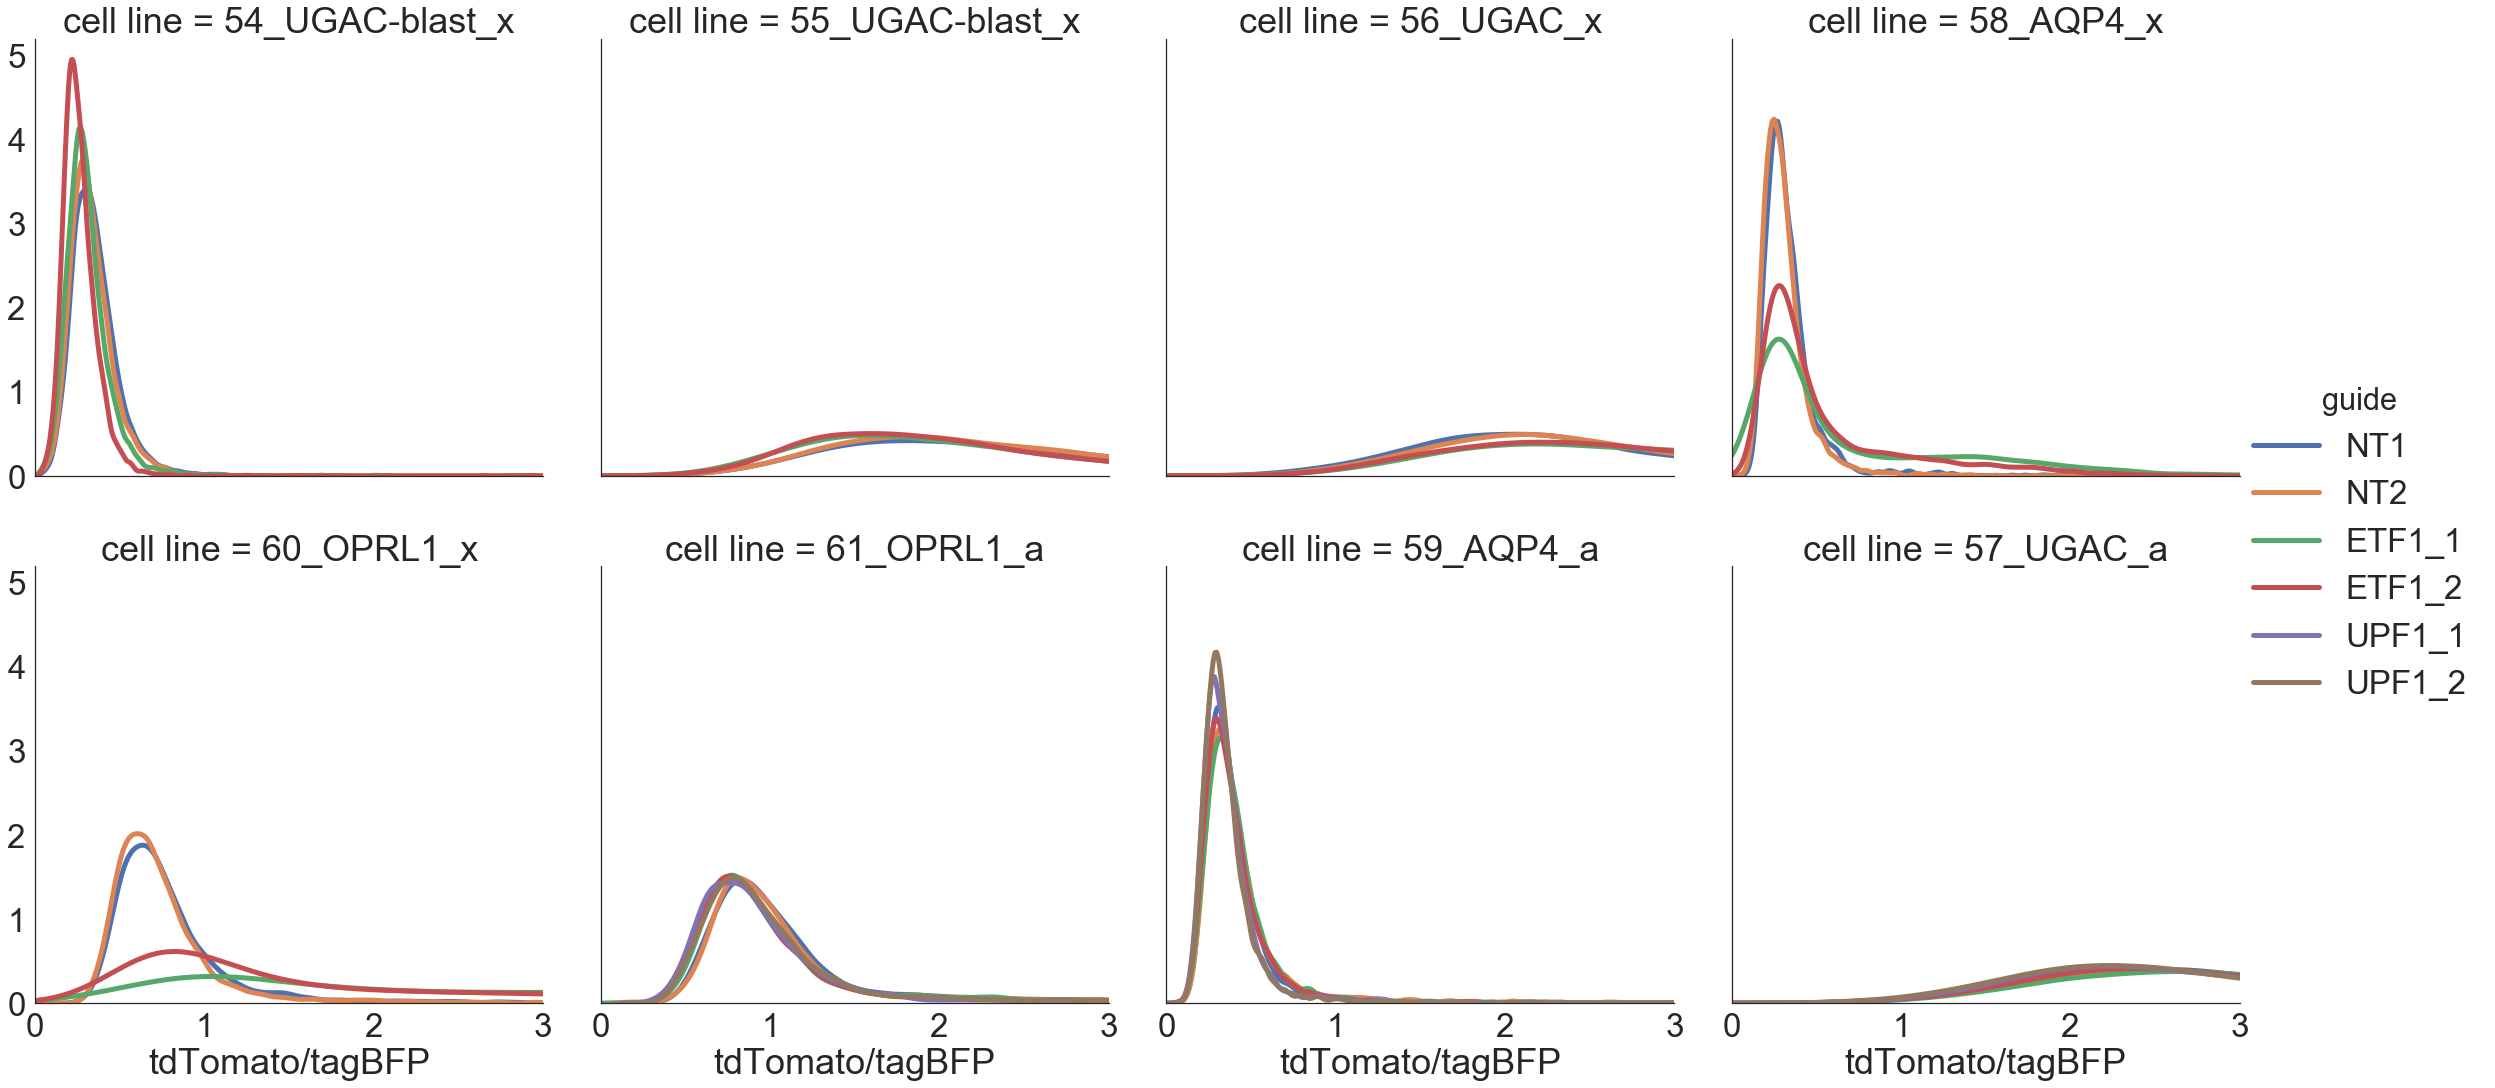

In [19]:
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True, font_scale=3)
g = sns.FacetGrid(good_scatter, hue='guide', col='cell line', col_wrap=4, height=8, xlim=(0,3))
g.map(sns.kdeplot, "tdTomato/tagBFP", linewidth = 5, gridsize=1000, clip =(0, 10))
#g.fig.suptitle("filtered for td", size=16)
g.add_legend();
plt.savefig('20181019_tdTomato_tagBFP_ratio_kde.pdf', transparent=True)


54_UGAC-blast_x NT1 bottom 5 gate: 4.98
54_UGAC-blast_x NT1 top 5 gate: 4.98
54_UGAC-blast_x NT2 bottom 5 gate: 6.19
54_UGAC-blast_x NT2 top 5 gate: 4.14
54_UGAC-blast_x ETF1_1 bottom 5 gate: 9.38
54_UGAC-blast_x ETF1_1 top 5 gate: 3.34
54_UGAC-blast_x ETF1_2 bottom 5 gate: 14.30
54_UGAC-blast_x ETF1_2 top 5 gate: 1.00
55_UGAC-blast_x NT1 bottom 5 gate: 4.99
55_UGAC-blast_x NT1 top 5 gate: 4.99
55_UGAC-blast_x NT2 bottom 5 gate: 5.01
55_UGAC-blast_x NT2 top 5 gate: 3.47
55_UGAC-blast_x ETF1_1 bottom 5 gate: 8.83
55_UGAC-blast_x ETF1_1 top 5 gate: 7.91
55_UGAC-blast_x ETF1_2 bottom 5 gate: 7.81
55_UGAC-blast_x ETF1_2 top 5 gate: 5.22
56_UGAC_x NT1 bottom 5 gate: 4.98
56_UGAC_x NT1 top 5 gate: 4.90
56_UGAC_x NT2 bottom 5 gate: 3.61
56_UGAC_x NT2 top 5 gate: 5.33
56_UGAC_x ETF1_1 bottom 5 gate: 2.32
56_UGAC_x ETF1_1 top 5 gate: 12.57
56_UGAC_x ETF1_2 bottom 5 gate: 2.30
56_UGAC_x ETF1_2 top 5 gate: 10.24
58_AQP4_x NT1 bottom 5 gate: 4.99
58_AQP4_x NT1 top 5 gate: 4.99
58_AQP4_x NT2 bottom

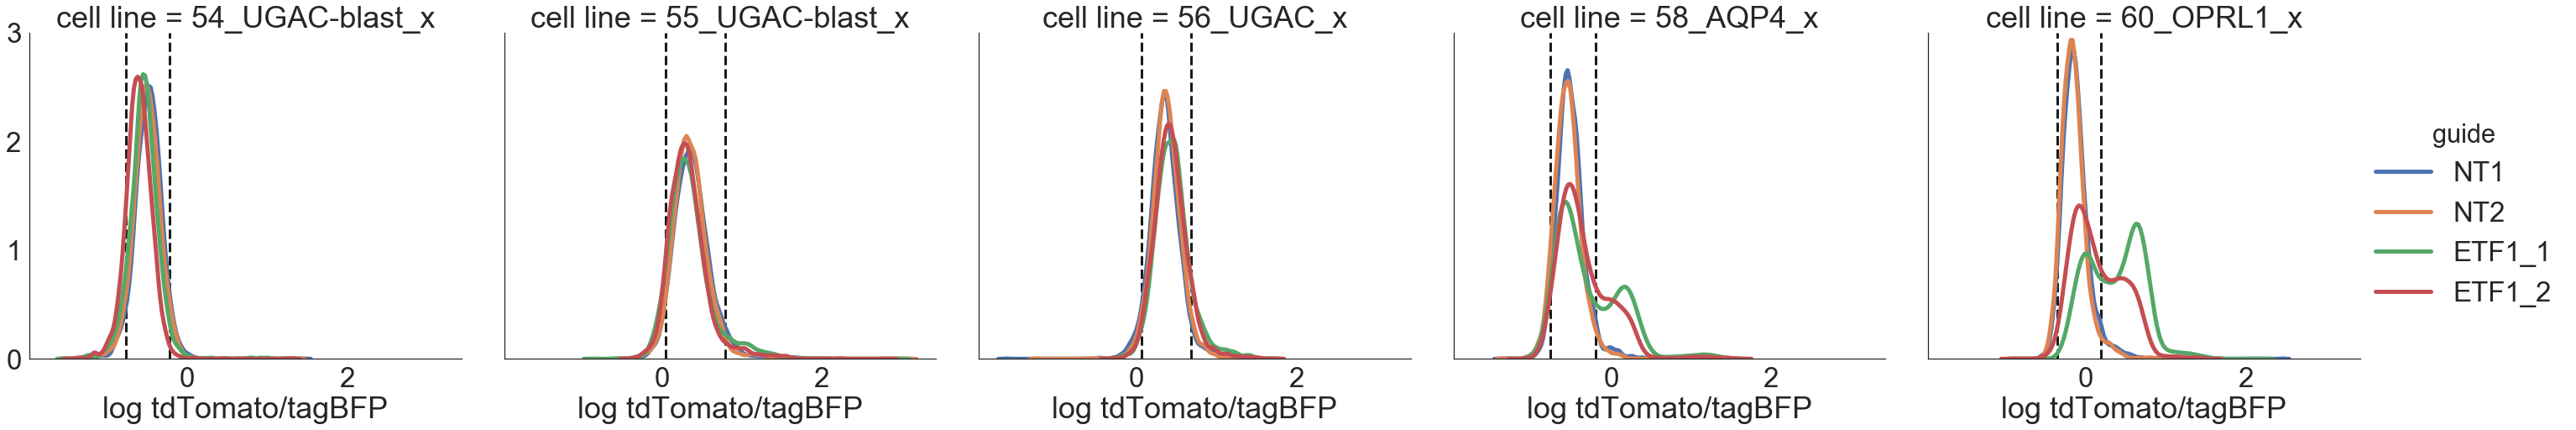

In [33]:
#Figure out top and bottom 5% cutoff for controls, then compute gate %
CRISPRx_lines = ['54_UGAC-blast_x', '55_UGAC-blast_x', '56_UGAC_x','58_AQP4_x','60_OPRL1_x']
CRISPRx_data = good_scatter[good_scatter['cell line'].isin(CRISPRx_lines)]

from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True, font_scale=3)
g = sns.FacetGrid(CRISPRx_data, col_order=CRISPRx_lines, hue='guide', col='cell line', col_wrap=5, height=8)
g.map(sns.kdeplot, "log tdTomato/tagBFP", linewidth = 5)
#g.fig.suptitle("filtered for td", size=16)
g.add_legend();
axes = g.axes
#axes[0].vlines((bottom5_56, top5_56),0,3, linestyle='dashed', lw=3)
#axes[1].vlines((bottom5_58, top5_58),0,3, linestyle='dashed', lw=3)


ax_index = 0
guides = ['NT1', 'NT2', 'ETF1_1', 'ETF1_2']
for cell_line in CRISPRx_lines:
    untreated_distribution = good_scatter[good_scatter['sample'] == '%s NT1' % (cell_line)].sort_values(by='log tdTomato/tagBFP')
    bottom5  = untreated_distribution.iloc[int(.05*len(untreated_distribution))]['log tdTomato/tagBFP']
    top5  = untreated_distribution.iloc[int(.95*len(untreated_distribution))]['log tdTomato/tagBFP']
    axes[ax_index].vlines((bottom5, top5),0,3, linestyle='dashed', lw=3)
    axes[ax_index].set_ylim(0,3)
    for guide in guides:
        sample = '%s %s' % (cell_line, guide)
        sample_data = good_scatter[good_scatter['sample']==sample]
        print '%s bottom 5 gate: %.2f' % (sample, 100.*len(sample_data[sample_data['log tdTomato/tagBFP']<bottom5])/float(len(sample_data)))
        print '%s top 5 gate: %.2f' % (sample, 100.*len(sample_data[sample_data['log tdTomato/tagBFP']>top5])/float(len(sample_data)))
    ax_index+=1
    
plt.savefig('20181104_log_tdTomato_tagBFP_ratio_kde_CRISPRx_gating.pdf', transparent=True)


61_OPRL1_a NT1 bottom 5 gate: 4.98
61_OPRL1_a NT1 top 5 gate: 4.98
61_OPRL1_a NT2 bottom 5 gate: 4.63
61_OPRL1_a NT2 top 5 gate: 9.04
61_OPRL1_a ETF1_1 bottom 5 gate: 8.19
61_OPRL1_a ETF1_1 top 5 gate: 6.85
61_OPRL1_a ETF1_2 bottom 5 gate: 11.43
61_OPRL1_a ETF1_2 top 5 gate: 4.91
61_OPRL1_a UPF1_1 bottom 5 gate: 11.76
61_OPRL1_a UPF1_1 top 5 gate: 3.89
61_OPRL1_a UPF1_2 bottom 5 gate: 9.49
61_OPRL1_a UPF1_2 top 5 gate: 3.92
59_AQP4_a NT1 bottom 5 gate: 4.98
59_AQP4_a NT1 top 5 gate: 4.93
59_AQP4_a NT2 bottom 5 gate: 4.58
59_AQP4_a NT2 top 5 gate: 7.30
59_AQP4_a ETF1_1 bottom 5 gate: 5.77
59_AQP4_a ETF1_1 top 5 gate: 6.40
59_AQP4_a ETF1_2 bottom 5 gate: 6.58
59_AQP4_a ETF1_2 top 5 gate: 3.74
59_AQP4_a UPF1_1 bottom 5 gate: 8.41
59_AQP4_a UPF1_1 top 5 gate: 3.17
59_AQP4_a UPF1_2 bottom 5 gate: 7.91
59_AQP4_a UPF1_2 top 5 gate: 3.09
57_UGAC_a NT1 bottom 5 gate: 4.99
57_UGAC_a NT1 top 5 gate: 4.96
57_UGAC_a NT2 bottom 5 gate: 4.74
57_UGAC_a NT2 top 5 gate: 6.80
57_UGAC_a ETF1_1 bottom 5 ga

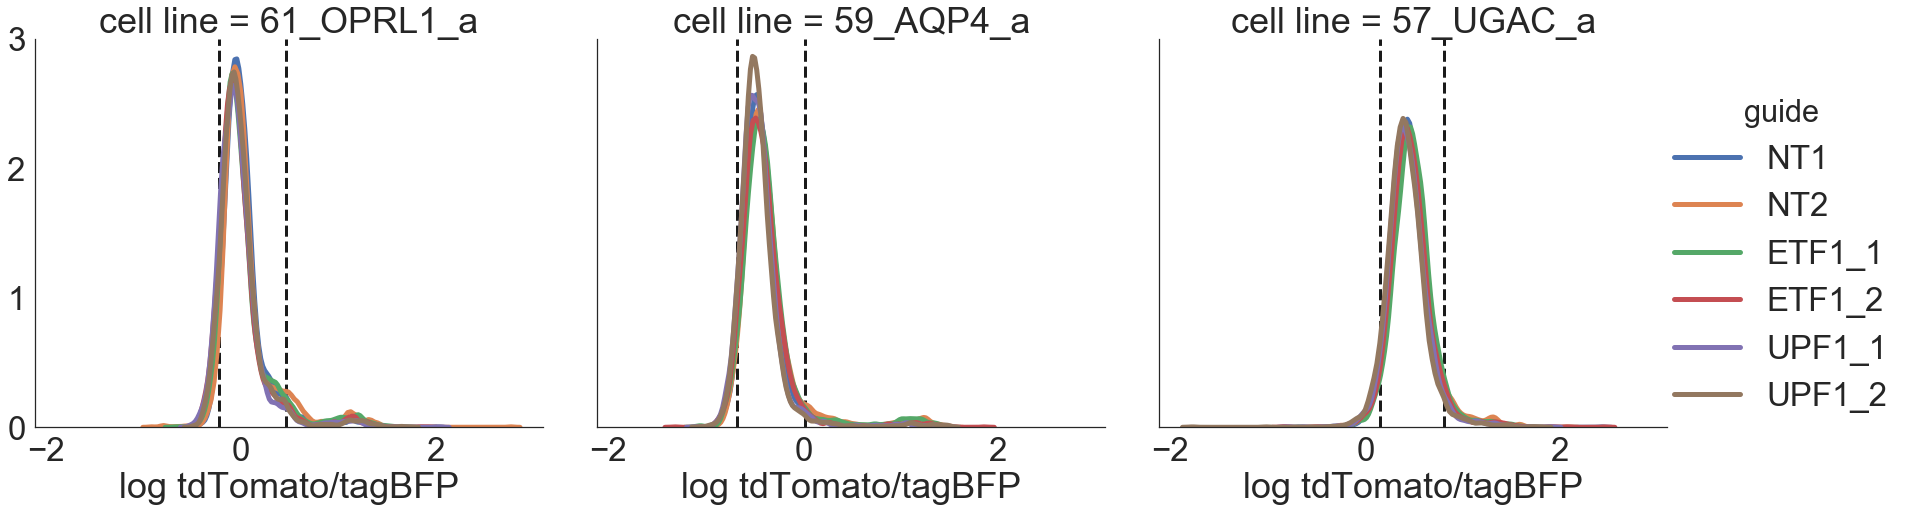

In [31]:
#Figure out top and bottom 5% cutoff for controls, then compute gate %
CRISPRa_lines = ['61_OPRL1_a', '59_AQP4_a', '57_UGAC_a']
CRISPRa_data = good_scatter[good_scatter['cell line'].isin(CRISPRa_lines)]
guides = ['NT1', 'NT2', 'ETF1_1', 'ETF1_2', 'UPF1_1', 'UPF1_2']

from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True, font_scale=3)
g = sns.FacetGrid(CRISPRa_data, col_order=CRISPRa_lines, hue='guide', hue_order=guides, col='cell line', col_wrap=3, height=8)
g.map(sns.kdeplot, "log tdTomato/tagBFP", linewidth = 5)
#g.fig.suptitle("filtered for td", size=16)
g.add_legend();
axes = g.axes
#axes[0].vlines((bottom5_56, top5_56),0,3, linestyle='dashed', lw=3)
#axes[1].vlines((bottom5_58, top5_58),0,3, linestyle='dashed', lw=3)


ax_index = 0
for cell_line in CRISPRa_lines:
    untreated_distribution = good_scatter[good_scatter['sample'] == '%s NT1' % (cell_line)].sort_values(by='log tdTomato/tagBFP')
    bottom5  = untreated_distribution.iloc[int(.05*len(untreated_distribution))]['log tdTomato/tagBFP']
    top5  = untreated_distribution.iloc[int(.95*len(untreated_distribution))]['log tdTomato/tagBFP']
    axes[ax_index].vlines((bottom5, top5),0,3, linestyle='dashed', lw=3)
    axes[ax_index].set_ylim(0,3)
    for guide in guides:
        sample = '%s %s' % (cell_line, guide)
        sample_data = good_scatter[good_scatter['sample']==sample]
        print '%s bottom 5 gate: %.2f' % (sample, 100.*len(sample_data[sample_data['log tdTomato/tagBFP']<bottom5])/float(len(sample_data)))
        print '%s top 5 gate: %.2f' % (sample, 100.*len(sample_data[sample_data['log tdTomato/tagBFP']>top5])/float(len(sample_data)))
    ax_index+=1
    
plt.savefig('20181104_log_tdTomato_tagBFP_ratio_kde_CRISPRa_gating.pdf', transparent=True)
